In [133]:
#pip install pyreadstat


In [134]:
#pip install xgboost

In [135]:
#pip install --upgrade pip

## Thesis Project Research: 
#### PREDICTING THE DIAGNOSIS OF INTERNET GAMING DISORDER IN VIDEOGAME PLAYERS USING SUPERVISED MACHINE LEARNING 

### Student: Erick Monga Valdiviezo
Student number: 2103689

Thesis Supervisor: Dr. Fred Atilla


### 0.1. Packages 


In [136]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform


from sklearn import datasets
import time

from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

from scipy.stats import randint
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

|   Packages |	Version	| Purpose |	Reference |
| --- | --- | --- | --- |
|Python             |3.9.12     |	Programming Language	    |   |
|Pandas             |1.5.3	    |   Data management	            |pandas.pydata.org|
|NumPy              |1.24.2     |	Numerical computing	        |numpy.org|
|Seaborn            |0.12.2     |	Data visualization	        |seaborn.pydata.org|
|Scikit-Learn	    |1.2.2      |	Machine learning	        |scikit-learn.org|
|Matplotlib	        |3.7.1      |	Data visualization	        |matplotlib.org|
|Scipy	            |1.10.1     |	Scientific computing	    |scipy.org|
|Imbalanced-Learn	|0.10.1     |	Machine learning            |imbalanced-learn.org|
|PyreadStat	        |1.2.1	    |   Data file conversion to pandas Dataframes    |github.com/Roche/pyreadstat|

### 0.2. Variables

| Variable | Description |
| --- | --- |
| 0. COUNTRY | Country of residence |
| 1. Gender | Biological Gender|
| 2. Age | Current age|
| 3. Occupation | present occupational position (if not working now, their last occupational position)|
| 4. Unemployed | Unemployed or not |
| 5. Education | highest level of education you have completed? |
| 6. SchoolYears | How many years have you spent at school or in full-time study |
| 7. LivingWith | Who the subject is living with |
| 8. RelationshipStat | Are you involved in a romantic relationship at the moment?|
| 9. PartnerParticipate | If yes, does your partner participate in your most preferred internet game? |
| 10. InternetYears | How many years have you been using the internet? |
| 11. OnlineHoursWeekday | What is the average number of hours that you are online on a weekend day? |
| 12. PGameYears | How many years have you been playing your most preferred online game? |
| 13. PGameHours | What is the average number of hours you spend playing your most preferred game on a weekday?' |
| 14. Genre | What is your most preferred game genre?|
| 15. SecondApp | What is your second most preferred internet application? |
| 16. IGDTotalScore | IGD Total Score (IGD9-SF)|
| 17. IA | Inattention |
| 18. HI | Hyperactivity-Impulsivity |
| 19. ADHDTotal | ADHDTotal score|
| 20. HorInd | Horizontal Individualism |
| 21. VerInd | Vertical Individualism |
| 22. HorCol | Horizontal Collectivism |
| 23. VerCol | Vertical Collectivism |
| 24. Stress | Stress Dass |
| 25. Anxiety | Anxiety Dass |
| 26. Depression | Depression Dass |
| Extra: Individual items of the psychometric tests | The Individualism and Collectivism Scale/Culture Orientation Scale (ICS; Triandis and Gelfand, 1998); The Depression Anxiety Stress Scale (DASS-21;Lovibond & Lovibond, 1995); The ADHD Self-Report Scale (ASRS; Kessler, 2005); The Internet Gaming Disorder Scale-Short Form (IGD9-SF; Pontes & Griffiths, 2015)

## 1 Loading data, metadata & labels

In [137]:
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

dfraw, meta = pyreadstat.read_sav("Final data/IGRG3.sav") #change directory to the data location

In [138]:
# Excluding missing values & rearranging the indexes
df = dfraw.dropna()
df = df.reset_index(drop=True)
df.iloc[:,15:30] #all my variables are numeric or categorical


,SecondApp,IGDTotalScore,IA,HI,ADHDTotal,HorInd,VerInd,HorCol,VerCol,Stress,Anxiety,Depression,IGD_Q1,IGD_Q2,IGD_Q3
0,2.0,11.0,6.0,9.0,15.0,36.0,36.0,25.0,34.0,0.0,0.0,0.0,1.0,1.0,1.0
1,2.0,12.0,15.0,17.0,33.0,30.0,28.0,28.0,31.0,7.0,3.0,5.0,1.0,1.0,2.0
2,1.0,15.0,11.0,11.0,23.0,21.0,27.0,32.0,22.0,10.0,10.0,5.0,1.0,2.0,1.0
3,2.0,23.0,19.0,24.0,45.0,20.0,15.0,28.0,25.0,12.0,16.0,12.0,1.0,3.0,3.0
4,2.0,18.0,11.0,14.0,26.0,27.0,16.0,29.0,19.0,11.0,7.0,13.0,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,2.0,11.0,1.0,8.0,9.0,25.0,22.0,9.0,22.0,1.0,0.0,0.0,2.0,1.0,1.0
960,1.0,14.0,8.0,24.0,34.0,20.0,8.0,20.0,24.0,5.0,6.0,3.0,3.0,1.0,3.0
961,6.0,18.0,9.0,4.0,16.0,24.0,19.0,25.0,20.0,3.0,4.0,5.0,3.0,1.0,1.0
962,2.0,21.0,24.0,21.0,46.0,24.0,28.0,28.0,23.0,14.0,14.0,16.0,3.0,3.0,2.0


Choosing features that will be used

In [139]:
#df = df.drop(df.iloc[:, 27:], axis=1)
df = df.drop(df.loc[:, 'IGD_Q1':], axis=1)


In [140]:
df.columns


Index(['COUNTRY', 'Gender', 'Age', 'Occupation', 'Unemployed', 'Education',
       'SchoolYears', 'LivingWith', 'RelationshipStat', 'PartnerParticipate',
       'InternetYears', 'OnlineHoursWeekday', 'PGameYears', 'PGameHours',
       'Genre', 'SecondApp', 'IGDTotalScore', 'IA', 'HI', 'ADHDTotal',
       'HorInd', 'VerInd', 'HorCol', 'VerCol', 'Stress', 'Anxiety',
       'Depression'],
      dtype='object')

### Exploring metadata

Variable names & descriptions

In [141]:
print(meta) 

variable_names = meta.column_names

#reading variables descriptions
#meta.column_labels
var_labels = meta.column_labels
var_labels

['COUNTRY',
 'Biological Gender',
 'Current age',
 'What is your present occupational position (if not working now, your last occupational position)?',
 'Unemployed or not',
 'What is the highest level of education you have completed?',
 'How many years have you spent at school or in full-time study?',
 'You are living with:',
 'Are you involved in a romantic relationship at the moment?',
 'If yes, does your partner participate in your most preferred internet game?',
 'How many years have you been using the internet?',
 'What is the average number of hours that you are online on a weekend day?',
 'How many years have you been playing your most preferred online game?',
 'What is the average number of hours you spend playing your most preferred game on a weekday?',
 'What is your most preferred game genre?',
 'What is your second most preferred internet application?',
 'IGD Total Score',
 'Inattention',
 'Hyperactivity-Impulsivity',
 'ADHDTotal',
 'Horizontal Individualism',
 'Vertical I

### Variable values meaning

In [142]:
value_labels = meta.variable_value_labels
df_variables = pd.DataFrame(value_labels)
print(df_variables.to_markdown())

|    | COUNTRY        | Gender   | Occupation           | Unemployed     | Education                                                                    | LivingWith                                               | RelationshipStat   | PartnerParticipate   | Genre                                                                                                                 | SecondApp           | IGD_Q1     | IGD_Q2     | IGD_Q3     | IGD_Q4     | IGD_Q5     | IGD_Q6     | IGD_Q7     | IGD_Q8     | IGD_Q9     | ADHD_Q1    | ADHD_Q2    | ADHD_Q3    | ADHD_Q4    | ADHD_Q5    | ADHD_Q6    | ADHD_Q7    | ADHD_Q8    | ADHD_Q9    | ADHD_Q10   | ADHD_Q11   | ADHD_Q12   | ADHD_Q13   | ADHD_Q14   | ADHD_Q15   | ADHD_Q16   | ADHD_Q17   | ADHD_Q18   | CULTURE_Q1                       | CULTURE_Q2                       | CULTURE_Q3                       | CULTURE_Q4                       | CULTURE_Q5                       | CULTURE_Q6                       | CULTURE_Q7                       | CULTU

## 2 EDA

Identifying variable types

In [143]:
categorical_columns = ['COUNTRY', 'Gender', 'Occupation', 'Unemployed', 'LivingWith', 'RelationshipStat', 'PartnerParticipate', 'Genre'
                       , 'SecondApp']
numerical_columns = ['Age', 'SchoolYears', 'InternetYears', 'OnlineHoursWeekday', 'PGameYears', 'PGameHours', 'IA'
                     , 'HI', 'ADHDTotal', 'HorInd', 'VerInd', 'HorCol', 'VerCol', 'Stress', 'Anxiety', 'Depression']
ordinal_columns = ['Education'] #also for individual items


Descriptive Statistics

In [144]:
df.iloc[:,9:].describe()


,PartnerParticipate,InternetYears,OnlineHoursWeekday,PGameYears,PGameHours,Genre,SecondApp,IGDTotalScore,IA,HI,ADHDTotal,HorInd,VerInd,HorCol,VerCol,Stress,Anxiety,Depression
count,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.00000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,0.276971,14.975104,7.920124,5.264523,3.665975,6.132780,2.327801,21.119295,14.492739,14.323651,30.422199,26.48444,18.179461,25.934647,22.728216,6.993776,5.384855,7.567427
std,0.447734,4.966910,4.722942,4.381300,3.319354,2.400459,1.645793,7.141885,6.209642,6.000608,11.973108,5.10805,6.109417,6.171054,5.997299,4.380401,4.417963,5.768700
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-2.000000,9.000000,0.000000,0.000000,0.000000,6.00000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,5.000000,2.000000,2.000000,6.000000,1.000000,16.000000,10.000000,10.000000,22.000000,23.00000,14.000000,23.000000,19.000000,4.000000,2.000000,3.000000
50%,0.000000,15.000000,7.000000,4.000000,3.000000,7.000000,2.000000,20.000000,14.000000,14.000000,30.000000,27.00000,18.000000,27.000000,23.000000,7.000000,5.000000,7.000000
75%,1.000000,18.000000,10.000000,8.000000,5.000000,7.000000,2.000000,25.000000,18.000000,18.000000,37.000000,30.00000,22.000000,31.000000,27.000000,10.000000,8.000000,12.000000
max,1.000000,36.000000,20.000000,29.000000,20.000000,13.000000,6.000000,45.000000,32.000000,36.000000,72.000000,36.00000,36.000000,36.000000,36.000000,21.000000,21.000000,21.000000


In [145]:
df.dtypes

COUNTRY               float64
Gender                float64
Age                   float64
Occupation            float64
Unemployed            float64
Education             float64
SchoolYears           float64
LivingWith            float64
RelationshipStat      float64
PartnerParticipate    float64
InternetYears         float64
OnlineHoursWeekday    float64
PGameYears            float64
PGameHours            float64
Genre                 float64
SecondApp             float64
IGDTotalScore         float64
IA                    float64
HI                    float64
ADHDTotal             float64
HorInd                float64
VerInd                float64
HorCol                float64
VerCol                float64
Stress                float64
Anxiety               float64
Depression            float64
dtype: object

Correlations

                     COUNTRY    Gender       Age  Occupation  Unemployed  \
COUNTRY             1.000000 -0.071641  0.015310    0.060967   -0.035974   
Gender             -0.071641  1.000000 -0.024356    0.067462    0.053124   
Age                 0.015310 -0.024356  1.000000   -0.139196   -0.173561   
Occupation          0.060967  0.067462 -0.139196    1.000000    0.443770   
Unemployed         -0.035974  0.053124 -0.173561    0.443770    1.000000   
Education           0.031592  0.056362  0.241808   -0.135602   -0.114391   
SchoolYears        -0.062082  0.047506  0.108988   -0.012653   -0.014105   
LivingWith          0.005230 -0.010204  0.339422   -0.161550   -0.117125   
RelationshipStat    0.053085  0.097715  0.203557   -0.103364   -0.135051   
PartnerParticipate  0.039214  0.225642 -0.005741    0.051677   -0.006573   
InternetYears       0.027480 -0.055971  0.611597   -0.149803   -0.140067   
OnlineHoursWeekday -0.016597 -0.045385 -0.121900    0.092804    0.177484   
PGameYears  

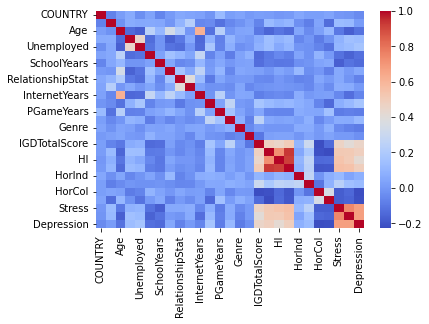

In [146]:
#df[df.columns[1:]].corr()['IGDTotalScore'][:].sort_values(ascending=False)
corr_matrix = df.corr()
print(corr_matrix)
#print(df[df.columns[1:]].corr()['IGD_presence'][:].sort_values(ascending=False))

sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

### Variable Distributions 

IGD distribution

max value: 45.0
total obs: 964
IGD presence: 46
no IGD: 918


C:\Users\erick\AppData\Local\Temp\ipykernel_30440\4009646714.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False, axis='both')


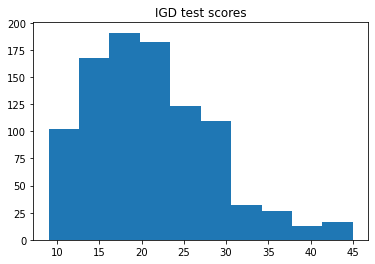

In [147]:
print('max value:', df["IGDTotalScore"].max())

# checking balance of my Y variable (Internet Gaming Disorder)
IGDscores = df["IGDTotalScore"]
IGDscores.hist()
plt.title('IGD test scores')
plt.grid(b=False, axis='both')

#--------------------
print('total obs:', len(df['IGDTotalScore']))
#gender = df["Gender"].value_counts()

#-----------------
positiveIGD = (df["IGDTotalScore"]>=36).sum()
print('IGD presence:',positiveIGD)

negativeIGD = (df["IGDTotalScore"]<36).sum()
print('no IGD:',negativeIGD)

Anxiety

max value: 21.0
964


Text(0.5, 1.0, 'Anxiety DASS scores')

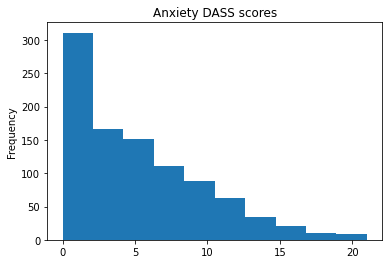

In [148]:
anxiety = df["Anxiety"]
print('max value:', df["Anxiety"].max())
anxiety.plot(kind='hist')

print(len(df['Anxiety']))
plt.title('Anxiety DASS scores')

In [149]:
print('DASS anxiety')

positiveIGD = (df["Anxiety"]>14).sum()
print(positiveIGD)

negativeIGD = (df["Anxiety"]<14).sum()
print(negativeIGD)

DASS anxiety
39
909


Depression

max value: 21.0


Text(0.5, 1.0, 'Depression Scores Distribution')

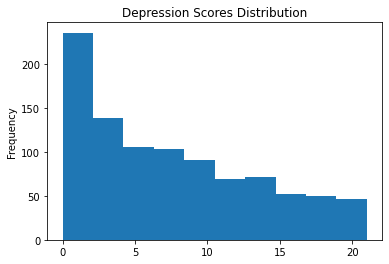

In [150]:
print('max value:', df["Depression"].max())

depression = df["Depression"]

depression.plot(kind='hist')

plt.title('Depression Scores Distribution')


ADHD

max value: 72.0
964


Text(0.5, 1.0, 'ADHD tests')

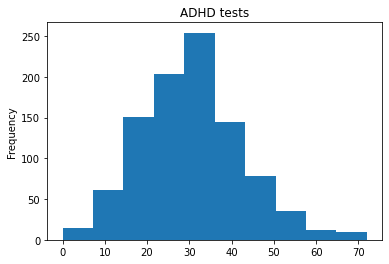

In [151]:
print('max value:', df["ADHDTotal"].max())

ADHD = df["ADHDTotal"]
ADHD.plot(kind='hist')

print(len(df['ADHDTotal']))
plt.title('ADHD tests')

Stress

max value: 21.0


Text(0.5, 1.0, 'Stress scores')

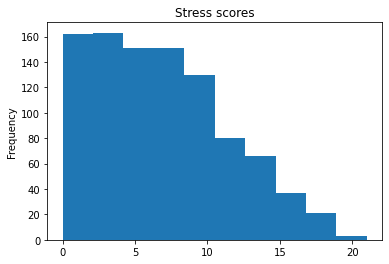

In [152]:
print('max value:', df["Stress"].max())

stress = df["Stress"]

stress.plot(kind='hist')

plt.title('Stress scores')

Game Genre

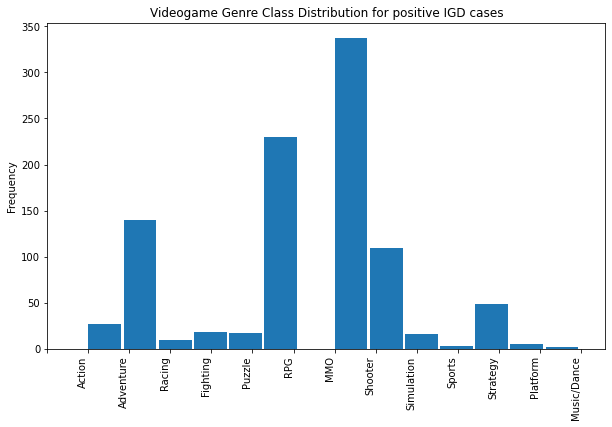

In [153]:
genres =df["Genre"]

custom_labels = ['','Action', 'Adventure', 'Racing', 'Fighting', 'Puzzle', 'RPG', 'MMO', 'Shooter', 'Simulation', 'Sports', 'Strategy', 'Platform', 'Music/Dance']
num_genres = len(custom_labels)

plt.figure(figsize=(10, 6))
genres.plot(kind='hist', bins=num_genres, width=0.8, align='mid')

plt.xticks(range(num_genres), custom_labels, rotation='vertical', ha='right')  

plt.title('Videogame Genre Class Distribution for positive IGD cases')

plt.show()

Country

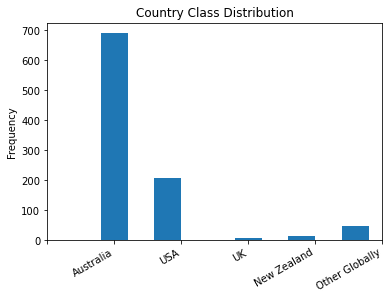

In [154]:
countries = df['COUNTRY']

custom_labels = ['','Australia', 'USA', 'UK', 'New Zealand', 'Other Globally']
num_genres = len(custom_labels)

plt.figure()
countries.plot(kind='hist', align='left')

plt.xticks(range(num_genres), custom_labels, rotation='30', ha='right')  

plt.title('Country Class Distribution')

plt.show()

In [155]:
df['COUNTRY'].value_counts().sort_index()


1.0    690
2.0    206
3.0      7
4.0     14
5.0     47
Name: COUNTRY, dtype: int64

## 3 Preprocessing

Erasing outliers

In [156]:
print(df['Education'].value_counts())
df[df['Education'] == 5] # education == 5 has no meaning according the dataset description

2.0    337
4.0    329
3.0    273
1.0     24
5.0      1
Name: Education, dtype: int64


,COUNTRY,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,...,IA,HI,ADHDTotal,HorInd,VerInd,HorCol,VerCol,Stress,Anxiety,Depression
541,5.0,1.0,25.0,5.0,0.0,5.0,7.0,1.0,1.0,0.0,...,10.0,10.0,21.0,23.0,17.0,27.0,23.0,5.0,5.0,2.0


In [157]:
print(df['SecondApp'].value_counts()) #here values of 0 or negative values does not have any meaning, therefore are missinputs from the author 
#df['SecondApp'].hist()
df[df['SecondApp'] <= 0]

 2.0    457
 1.0    318
 6.0    118
 5.0     44
 4.0     18
 3.0      5
 0.0      2
-2.0      1
-1.0      1
Name: SecondApp, dtype: int64


,COUNTRY,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,...,IA,HI,ADHDTotal,HorInd,VerInd,HorCol,VerCol,Stress,Anxiety,Depression
285,1.0,1.0,21.0,2.0,0.0,2.0,16.0,1.0,0.0,0.0,...,15.0,19.0,31.0,21.0,17.0,24.0,22.0,4.0,7.0,18.0
447,1.0,1.0,23.0,3.0,0.0,2.0,10.0,10.0,0.0,0.0,...,12.0,11.0,25.0,29.0,15.0,22.0,24.0,5.0,7.0,11.0
862,1.0,1.0,36.0,1.0,0.0,3.0,15.0,8.0,0.0,0.0,...,13.0,14.0,32.0,22.0,16.0,28.0,22.0,4.0,3.0,4.0
916,1.0,0.0,41.0,2.0,0.0,3.0,15.0,7.0,1.0,0.0,...,15.0,13.0,29.0,28.0,18.0,26.0,28.0,4.0,5.0,10.0


In [158]:
df = df.drop(df[df['SecondApp'] <= 0].index)
df = df.drop(df[df['Education'] == 5].index)

print(df['SecondApp'].value_counts())
df['Education'].value_counts()

2.0    456
1.0    318
6.0    118
5.0     44
4.0     18
3.0      5
Name: SecondApp, dtype: int64


2.0    335
4.0    329
3.0    271
1.0     24
Name: Education, dtype: int64

Creating dependant variable, using binarizer

In [159]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=35) #Threshold based on literature (See section 3 on Thesis)

df['IGD_presence'] = df['IGDTotalScore'].apply(lambda x: binarizer.transform([[x]])[0][0])

# Just checking the correct creation of label variable
index_of_1 = df['IGD_presence'].idxmax()
print(index_of_1)
df.iloc[60:71,[16,-1]]


67


,IGDTotalScore,IGD_presence
60,14.0,0.0
61,28.0,0.0
62,26.0,0.0
63,24.0,0.0
64,21.0,0.0
65,29.0,0.0
66,28.0,0.0
67,36.0,1.0
68,27.0,0.0
69,37.0,1.0


Dividing into Xs & y

In [160]:
# Changing variable type before SMOTE & splitting, does not affect the observations as the original values are all integers
for colu in categorical_columns:
    df[colu] = df[colu].astype('int64') 

for colu in ordinal_columns:
    df[colu] = df[colu].astype('int64') 

# Test set
for colu in categorical_columns:
    df[colu] = df[colu].astype('int64') 

for colu in ordinal_columns:
    df[colu] = df[colu].astype('int64') 

df.dtypes

COUNTRY                 int64
Gender                  int64
Age                   float64
Occupation              int64
Unemployed              int64
Education               int64
SchoolYears           float64
LivingWith              int64
RelationshipStat        int64
PartnerParticipate      int64
InternetYears         float64
OnlineHoursWeekday    float64
PGameYears            float64
PGameHours            float64
Genre                   int64
SecondApp               int64
IGDTotalScore         float64
IA                    float64
HI                    float64
ADHDTotal             float64
HorInd                float64
VerInd                float64
HorCol                float64
VerCol                float64
Stress                float64
Anxiety               float64
Depression            float64
IGD_presence          float64
dtype: object

In [161]:
X, y = df.drop('IGD_presence', axis=1), df[['IGD_presence']] 

Dropping the original variable of the dependant variable

In [162]:
print(y.head())
X = X.drop('IGDTotalScore',axis=1)
X.tail()

   IGD_presence
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0


,COUNTRY,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,...,IA,HI,ADHDTotal,HorInd,VerInd,HorCol,VerCol,Stress,Anxiety,Depression
959,2,1,62.0,5,0,3,21.0,7,1,0,...,1.0,8.0,9.0,25.0,22.0,9.0,22.0,1.0,0.0,0.0
960,2,1,62.0,5,0,2,8.0,8,1,0,...,8.0,24.0,34.0,20.0,8.0,20.0,24.0,5.0,6.0,3.0
961,2,0,63.0,5,1,4,17.0,7,1,0,...,9.0,4.0,16.0,24.0,19.0,25.0,20.0,3.0,4.0,5.0
962,1,1,64.0,5,1,3,14.0,7,1,0,...,24.0,21.0,46.0,24.0,28.0,28.0,23.0,14.0,14.0,16.0
963,1,1,72.0,1,1,4,7.0,7,1,0,...,1.0,2.0,4.0,27.0,16.0,35.0,19.0,2.0,4.0,0.0


In [163]:
X.shape

(959, 26)

## 4 Data Splitting into test/training sample

In [164]:
y = df['IGD_presence'].values.ravel()

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y) # stratifying the y variable because of imbalance (MAYBE CHANGE IF IS LOWERING THE ACCURACY)

# Displaying the quantities
print('Observations on y_train:', Counter(y_train)) 
print('X_train shape:', X_train.shape)

print('\nObservations on y_test:', Counter(y_test))
print('X_test shape:', X_test.shape)

#counter_ytr.items()

Observations on y_train: Counter({0.0: 639, 1.0: 32})
X_train shape: (671, 26)

Observations on y_test: Counter({0.0: 274, 1.0: 14})
X_test shape: (288, 26)


### 4.1 SMOTE & Random Undersampling 

Vizualizing y_train distribution

C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2248943832.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False, axis='both')


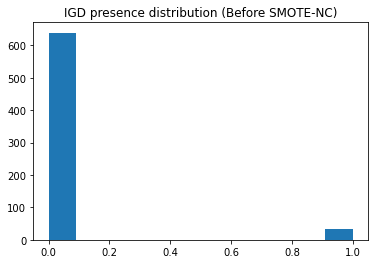

In [166]:
y_train_series = pd.Series(y_train)

plt.hist(y_train_series, bins='auto')
plt.title('IGD presence distribution (Before SMOTE-NC)')
plt.grid(b=False, axis='both')

This is done only to the train subsample

SMOTE-NC can be applied before encoding as it is designed to handle categorical features internally.

In [167]:
# in game genre I dont have class 11 & 13 on the test set
for colu in categorical_columns:
    X_train[colu] = X_train[colu].astype('int64') 

for colu in ordinal_columns:
    X_train[colu] = X_train[colu].astype('int64') 

# Test set
for colu in categorical_columns:
    X_test[colu] = X_test[colu].astype('int64') 

for colu in ordinal_columns:
    X_test[colu] = X_test[colu].astype('int64') 

In [168]:
print(Counter(y_train))

Counter({0.0: 639, 1.0: 32})


In [169]:
#extracting Indexes of the categorical columns
categorical_position = [X_train.columns.get_loc(col) for col in categorical_columns]
ordinal_position = [X_train.columns.get_loc(colu) for colu in ordinal_columns]

allcat_position = categorical_position + ordinal_position

over = SMOTENC(categorical_features=allcat_position, random_state=23,sampling_strategy=0.2) 
under = RandomUnderSampler(sampling_strategy=0.4, random_state=25) 

# transform the dataset
X_train_sm, y_train_sm = over.fit_resample(X_train, y_train) 
X_train_sm, y_train_sm = under.fit_resample(X_train_sm, y_train_sm) 

#checking dimension
print(Counter(y_train_sm))
X_train_sm.shape

#Source: following the principle of doing SMOTE + undersampling, and combining with SMOTENC
#https://practicaldatascience.co.uk/machine-learning/how-to-use-smote-for-imbalanced-classification
#https://imbalanced-learn.org/dev/over_sampling.html#smote-variants

Counter({0.0: 317, 1.0: 127})


(444, 26)

Checking generated observations scales & rounding generated numerical values

In [170]:
X_train_sm[numerical_columns] = X_train_sm[numerical_columns].round()

X_train_sm.tail()

,COUNTRY,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,...,IA,HI,ADHDTotal,HorInd,VerInd,HorCol,VerCol,Stress,Anxiety,Depression
439,1,0,24.0,3,1,2,9.0,1,0,0,...,23.0,24.0,48.0,33.0,11.0,22.0,18.0,8.0,7.0,12.0
440,1,1,21.0,3,1,2,2.0,1,1,0,...,20.0,23.0,44.0,31.0,27.0,21.0,15.0,14.0,9.0,17.0
441,1,0,25.0,2,1,4,2.0,10,0,0,...,26.0,25.0,52.0,28.0,23.0,20.0,23.0,18.0,12.0,18.0
442,1,1,21.0,1,0,4,12.0,10,1,0,...,31.0,35.0,70.0,33.0,34.0,34.0,34.0,19.0,19.0,18.0
443,1,0,22.0,3,1,3,14.0,10,1,0,...,26.0,26.0,54.0,32.0,25.0,17.0,16.0,12.0,15.0,14.0


C:\Users\erick\AppData\Local\Temp\ipykernel_30440\1240602975.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False, axis='both')


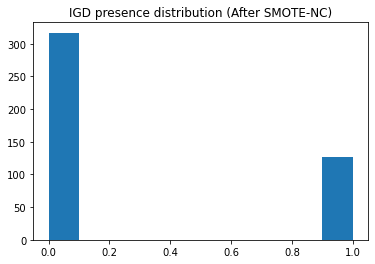

In [171]:
y_trainsm_series = pd.Series(y_train_sm)

plt.hist(y_trainsm_series, bins='auto')
plt.title('IGD presence distribution (After SMOTE-NC)')
plt.grid(b=False, axis='both')

### 4.1 Encoding variables

Encoding using ColumnTransformer

In [172]:
X_train.describe()
print(X_train['Occupation'].value_counts())
X_test['Occupation'].value_counts()

1    245
3    213
2    133
5     78
4      2
Name: Occupation, dtype: int64


1    114
3     79
2     53
5     41
4      1
Name: Occupation, dtype: int64

In [173]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ('ord', OrdinalEncoder(), ordinal_columns),
        ], remainder='passthrough')

# Fitting to the training data
preprocessor.fit(X_train_sm)

# Transform the training and testing data
X_train_enc = preprocessor.transform(X_train_sm)
X_test_enc = preprocessor.transform(X_test)

# Checking dimensions
print('X_train_sm:', X_train_sm.shape)
print('X_train encoded:', X_train_enc.shape)
print('X_test encoded:', X_test_enc.shape)
#Source: Adapted the code to combine column transformer and encoders 
#https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/
#https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

X_train_sm: (444, 26)
X_train encoded: (444, 65)
X_test encoded: (288, 65)


In [174]:
# Converting to pandas dataframe to check if correct encoded
X_encdf = pd.DataFrame(X_train_enc, index= X_train_sm.index)

X_encdf # here the columns order changes and the numeric variables (Education) go first  

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.137564,1.537221,1.085374,0.274202,-0.635840,-0.695282,-0.214001,0.107318,-0.028285,0.555650,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,-0.276059,0.714157,0.067836,-0.135716,-0.156531,0.167023,-0.505461,0.249555,-0.100876,1.197006,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
2,-0.965430,0.096858,-0.339179,1.094040,0.802086,1.029327,1.389034,-0.461628,0.407266,1.197006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.965430,0.302624,-0.949702,-0.545635,-1.115148,-0.407847,-1.671305,-1.599521,-1.697894,-1.154634,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.689681,-0.726206,-0.542687,0.274202,-1.115148,-0.695282,-0.214001,0.107318,-0.028285,0.769435,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,-0.138185,-0.520440,-0.339179,0.684121,-0.635840,1.891632,0.951843,1.102974,0.987999,1.197006,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
440,-0.551807,-1.960802,-0.949702,1.299000,-1.115148,0.167023,0.514652,0.960738,0.697632,0.769435,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
441,-0.000311,-1.960802,-0.135672,0.479162,0.322778,1.891632,1.389034,1.245211,1.278366,0.128079,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
442,-0.551807,0.096858,-0.135672,-1.160513,1.760704,-0.695282,2.117686,2.667577,2.585017,1.197006,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0


In [175]:
X_train.iloc[:,:]

,COUNTRY,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,...,IA,HI,ADHDTotal,HorInd,VerInd,HorCol,VerCol,Stress,Anxiety,Depression
622,2,1,26.0,1,0,4,12.0,7,1,1,...,11.0,11.0,23.0,28.0,18.0,29.0,21.0,3.0,1.0,0.0
528,1,0,24.0,1,0,3,4.0,2,1,0,...,23.0,21.0,46.0,32.0,24.0,31.0,33.0,13.0,12.0,14.0
615,2,1,26.0,5,0,4,8.0,7,1,0,...,15.0,16.0,32.0,27.0,17.0,31.0,22.0,9.0,6.0,11.0
482,1,1,24.0,1,0,4,12.0,1,1,0,...,17.0,15.0,30.0,24.0,15.0,30.0,21.0,10.0,7.0,8.0
709,1,1,28.0,1,0,3,3.0,2,0,1,...,8.0,7.0,16.0,19.0,9.0,25.0,17.0,4.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,0,18.0,5,1,2,12.0,3,0,0,...,13.0,17.0,32.0,17.0,16.0,27.0,21.0,9.0,8.0,19.0
339,5,1,22.0,5,0,3,10.0,4,1,0,...,18.0,17.0,35.0,28.0,17.0,25.0,24.0,8.0,6.0,6.0
818,1,1,32.0,2,0,3,15.0,9,1,0,...,4.0,8.0,13.0,36.0,21.0,27.0,22.0,10.0,2.0,4.0
146,2,0,19.0,3,1,4,1.0,1,0,0,...,13.0,18.0,34.0,15.0,26.0,35.0,23.0,11.0,13.0,20.0


### 4.3 FAMD

In [176]:
def check_categorical_consistency(train_data, test_data, categorical_columns):
    """
    Checking if categorical variables have the same categories across train and test sets.
    """
    consistency_dict = {}
    
    for column in categorical_columns:
        train_categories = set(train_data[column].unique())
        test_categories = set(test_data[column].unique())
        
        if train_categories == test_categories:
            consistency_dict[column] = True
        else:
            consistency_dict[column] = False
    
    return consistency_dict

In [177]:
# Check categorical consistency
consistency_dict = check_categorical_consistency(X_train_sm, X_test, categorical_columns)

# Print the consistency results
for column, is_consistent in consistency_dict.items():
    print(f"{column}: {is_consistent}")

COUNTRY: True
Gender: True
Occupation: True
Unemployed: True
LivingWith: True
RelationshipStat: True
PartnerParticipate: True
Genre: False
SecondApp: True


In [178]:
X_train_sm

,COUNTRY,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,...,IA,HI,ADHDTotal,HorInd,VerInd,HorCol,VerCol,Stress,Anxiety,Depression
0,1,0,26.0,3,0,3,19.0,1,0,0,...,15.0,17.0,34.0,30.0,22.0,36.0,25.0,7.0,0.0,3.0
1,1,1,23.0,2,0,4,15.0,7,1,1,...,13.0,18.0,33.0,33.0,21.0,31.0,23.0,8.0,7.0,6.0
2,5,1,18.0,3,1,2,12.0,2,0,0,...,26.0,13.0,40.0,33.0,17.0,31.0,17.0,13.0,12.0,15.0
3,2,0,18.0,3,1,2,13.0,1,0,0,...,5.0,5.0,11.0,22.0,12.0,27.0,31.0,4.0,3.0,6.0
4,1,1,20.0,1,0,3,8.0,1,0,0,...,15.0,17.0,34.0,31.0,15.0,27.0,23.0,1.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,1,0,24.0,3,1,2,9.0,1,0,0,...,23.0,24.0,48.0,33.0,11.0,22.0,18.0,8.0,7.0,12.0
440,1,1,21.0,3,1,2,2.0,1,1,0,...,20.0,23.0,44.0,31.0,27.0,21.0,15.0,14.0,9.0,17.0
441,1,0,25.0,2,1,4,2.0,10,0,0,...,26.0,25.0,52.0,28.0,23.0,20.0,23.0,18.0,12.0,18.0
442,1,1,21.0,1,0,4,12.0,10,1,0,...,31.0,35.0,70.0,33.0,34.0,34.0,34.0,19.0,19.0,18.0


In [179]:
X_train_sm['Genre'].value_counts().sort_index()

1       6
2      52
3       1
4       8
5       6
6      96
7     187
8      62
9       7
10      1
11     15
12      2
13      1
Name: Genre, dtype: int64

In [180]:
X_test.head()


,COUNTRY,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,...,IA,HI,ADHDTotal,HorInd,VerInd,HorCol,VerCol,Stress,Anxiety,Depression
478,1,0,24.0,1,0,2,12.0,10,0,0,...,5.0,13.0,18.0,28.0,21.0,32.0,25.0,7.0,3.0,7.0
646,1,1,27.0,1,0,2,8.0,7,1,1,...,4.0,9.0,13.0,25.0,14.0,36.0,21.0,8.0,4.0,8.0
703,1,0,28.0,2,0,4,19.0,6,1,0,...,14.0,11.0,27.0,17.0,16.0,17.0,28.0,2.0,2.0,4.0
597,1,1,26.0,2,0,4,18.0,6,1,0,...,6.0,9.0,16.0,22.0,19.0,28.0,18.0,2.0,2.0,3.0
711,1,1,28.0,1,0,4,4.0,7,1,1,...,13.0,18.0,33.0,31.0,10.0,29.0,21.0,5.0,3.0,5.0


In [181]:
#converting train/test sets variables to category type making sure that the values are in the same range
for column in categorical_columns:
    i=max(df[column].values)
    j=min(df[column].values)
    X_train_sm[column]=pd.Categorical(X_train_sm[column], categories=list(range(j,i+1,1)), ordered=False)


for column in ordinal_columns:
    i=max(df[column].values)
    j=min(df[column].values)
    X_train_sm[column]=pd.Categorical(X_train_sm[column], categories=list(range(j,i+1,1)), ordered=True)

X_train_sm.dtypes


for column in categorical_columns:
    i=max(df[column].values)
    j=min(df[column].values)
    X_test[column]=pd.Categorical(X_test[column], categories=list(range(j,i+1,1)), ordered=False)


for column in ordinal_columns:
    i=max(df[column].values)
    j=min(df[column].values)
    X_test[column]=pd.Categorical(X_test[column], categories=list(range(j,i+1,1)), ordered=True)

X_test.dtypes
for column in categorical_columns:
    i=max(df[column].values)
    j=min(df[column].values)
    X[column]=pd.Categorical(X[column], categories=list(range(j,i+1,1)), ordered=False)


for column in ordinal_columns:
    i=max(df[column].values)
    j=min(df[column].values)
    X[column]=pd.Categorical(X[column], categories=list(range(j,i+1,1)), ordered=True)

X.dtypes

COUNTRY               category
Gender                category
Age                    float64
Occupation            category
Unemployed            category
Education             category
SchoolYears            float64
LivingWith            category
RelationshipStat      category
PartnerParticipate    category
InternetYears          float64
OnlineHoursWeekday     float64
PGameYears             float64
PGameHours             float64
Genre                 category
SecondApp             category
IA                     float64
HI                     float64
ADHDTotal              float64
HorInd                 float64
VerInd                 float64
HorCol                 float64
VerCol                 float64
Stress                 float64
Anxiety                float64
Depression             float64
dtype: object

In [182]:
from prince import FAMD

In [183]:
#Comparing Classes of train/ test sets
print("Train Set:")
for column in ordinal_columns:
    unique_values = X_train_sm[column].unique()
    print(f"{column}: {unique_values}")

# Print unique values of categorical variables in the test set
print("\nTest Set:")
for column in ordinal_columns:
    unique_values = X_test[column].unique()
    print(f"{column}: {unique_values}")

Train Set:
Education: [3, 4, 2, 1]
Categories (4, int64): [1 < 2 < 3 < 4]

Test Set:
Education: [2, 4, 1, 3]
Categories (4, int64): [1 < 2 < 3 < 4]


In [184]:
famd = FAMD(n_components =20, n_iter = 100, random_state = 23)

X_train_famd = famd.fit_transform(X_train_sm) 
X_test_famd = famd.transform(X_test)  

#print(X_train_famd)
famd.scree_plot()


c:\Users\erick\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


alt.Chart(...)

In [185]:
famd.plot(
    X_train,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

In [186]:
famd.row_contributions_.sort_values(0, ascending=False).head(5).style.format('{:.3%}')

component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
44,1.294%,0.000%,0.445%,3.971%,0.395%,0.679%,0.010%,1.517%,0.097%,4.938%,2.228%,2.793%,0.983%,0.568%,2.199%,0.841%,1.793%,1.778%,0.492%,0.000%
210,1.064%,0.175%,0.037%,0.096%,0.084%,0.718%,0.013%,0.688%,0.471%,0.007%,0.315%,0.410%,0.898%,0.012%,0.017%,0.378%,0.819%,0.313%,0.067%,0.517%
96,1.029%,0.041%,0.251%,0.392%,0.082%,0.343%,0.027%,0.756%,0.161%,0.001%,0.039%,0.051%,0.040%,0.048%,0.016%,0.052%,0.011%,0.001%,0.188%,0.036%
163,1.015%,0.042%,0.234%,0.214%,0.013%,0.002%,0.092%,0.035%,0.214%,0.156%,0.186%,0.204%,0.059%,0.037%,0.081%,0.388%,0.059%,0.167%,0.336%,0.000%
84,0.866%,0.046%,0.023%,0.006%,0.004%,0.021%,0.020%,0.042%,0.144%,0.334%,0.032%,0.036%,0.052%,0.554%,0.477%,0.518%,0.072%,0.000%,0.096%,0.051%


In [187]:
famd.column_contributions_.sort_values(0,ascending=False).head(5).style.format('{:.3%}')

component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
variable,,,,,,,,,,,,,,,,,,,,
Occupation,3.803%,1.755%,1.960%,1.730%,3.991%,0.797%,2.602%,0.518%,1.912%,4.342%,1.812%,1.015%,0.885%,0.492%,1.167%,0.279%,1.533%,0.844%,1.254%,0.588%
LivingWith,3.695%,2.824%,5.381%,4.440%,3.227%,5.702%,5.951%,4.453%,5.612%,6.471%,4.867%,7.260%,2.399%,3.747%,3.743%,3.376%,2.791%,5.814%,1.088%,1.894%
Unemployed,2.136%,0.157%,0.350%,1.248%,0.356%,0.152%,0.153%,0.891%,0.017%,0.295%,0.702%,0.041%,0.000%,0.070%,0.055%,0.028%,0.000%,0.262%,0.001%,0.105%
IA,1.973%,0.182%,0.145%,0.274%,0.014%,0.150%,0.574%,0.147%,0.040%,0.122%,0.029%,0.022%,0.365%,0.009%,1.415%,0.645%,0.050%,0.001%,0.034%,0.024%
ADHDTotal,1.740%,0.288%,0.107%,0.221%,0.000%,0.228%,0.559%,0.156%,0.028%,0.204%,0.030%,0.040%,0.387%,0.003%,1.593%,0.661%,0.030%,0.026%,0.042%,0.007%


In [188]:
total_contributions = famd.column_contributions_.sum(axis=1).sort_values(ascending=False)

print(total_contributions)

variable
Genre                 1.275516
LivingWith            0.847339
SecondApp             0.458233
COUNTRY               0.359292
Occupation            0.332759
Education             0.268817
Gender                0.101575
RelationshipStat      0.081370
PartnerParticipate    0.076255
Unemployed            0.070206
ADHDTotal             0.063515
IA                    0.062153
Anxiety               0.054306
Stress                0.052787
HI                    0.052218
Depression            0.048361
Age                   0.046385
InternetYears         0.042575
VerInd                0.033154
OnlineHoursWeekday    0.032479
PGameYears            0.031397
PGameHours            0.031312
HorCol                0.031299
VerCol                0.028111
HorInd                0.018719
SchoolYears           0.014420
dtype: float64


 ### Locating a feature by its encoded feature index 

In [189]:
def get_transformed_column_names(preprocessor, original_columns):
    transformed_column_names = []

    for transformer_name, transformer, columns in preprocessor.transformers_:
        if transformer_name == 'num':
            transformed_column_names.extend(columns)
        elif transformer_name == 'cat':
            transformed_column_names.extend(transformer.get_feature_names_out(columns))
        elif transformer_name == 'ord':
            transformed_column_names.extend(columns)

    return transformed_column_names

transformed_column_names = get_transformed_column_names(preprocessor, X_train_sm.columns)

#
def get_original_variable(transformed_column_names, index):
    transformed_column = transformed_column_names[index]
    if "_" in transformed_column:
        return transformed_column.split("_")[0]
    else:
        return transformed_column

In [190]:
original_variable = get_original_variable(transformed_column_names, 36)
print("Original variable:", original_variable)


Original variable: LivingWith


# 5 Models

## 5.1 Logistic Regression

In [191]:
logreg = LogisticRegression(max_iter=1000, random_state=23)

param_dist = {
    'C': [0.001, 0.01, 0.1, 0.5, 0.7, 0.15, 1, 10, 100, 1000], 
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga']
}

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'avg_precision': make_scorer(average_precision_score)
}

# Grid Search 
model1_gs = GridSearchCV(logreg, param_grid=param_dist,  
    cv=5, scoring=scoring, refit='f1', n_jobs=-1
)

model1_gs.fit(X_train_enc, y_train_sm)

# Best hyperparameters
best_lr = model1_gs.best_estimator_
print('Best hyperparameters:',  model1_gs.best_params_)

y_pred1 = best_lr.predict(X_test_enc) #automatically use the best parameters

# Score on test
print(model1_gs.score(X_test_enc, y_test))

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred1))



Best hyperparameters: {'C': 0.15, 'penalty': 'l1', 'solver': 'saga'}
0.47058823529411764

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       274
         1.0       0.40      0.57      0.47        14

    accuracy                           0.94       288
   macro avg       0.69      0.76      0.72       288
weighted avg       0.95      0.94      0.94       288


Confusion Matrix:
[[262  12]
 [  6   8]]


## 5.2 Random Forest

Encoding for tree based algorithms (excludes scaling as these models can handle internally)

In [192]:
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ], remainder='passthrough')

# Fitting to the training data
preprocessor_rf.fit(X_train_sm)

# Transform the training and testing data
X_train_encrf = preprocessor_rf.transform(X_train_sm)
X_test_encrf = preprocessor_rf.transform(X_test)


# Checking dimensions
print(X_train_encrf.shape)
X_test_encrf.shape

(444, 65)


(288, 65)

Random search

In [193]:
param_dist = { 
    'n_estimators': randint(50, 200),
    'max_depth': randint(1, 30),
    'criterion': ['gini', 'entropy'],
    'max_features': randint(1, 65)
}
# Random Forest
rf = RandomForestClassifier(random_state=23)

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'avg_precision': make_scorer(average_precision_score)
}

# Random Search CV
model2_rs = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=100, 
                                 cv=5, scoring=scoring, refit='f1', n_jobs=-1, random_state=23)


model2_rs.fit(X_train_encrf, y_train_sm)


# Best hyperparameters
best_rf = model2_rs.best_estimator_
print('Best hyperparameters:',  model2_rs.best_params_)

y_pred2 = best_rf.predict(X_test_encrf) #automatically use the best parameters

# Score on test
print(model2_rs.score(X_test_encrf, y_test))

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 11, 'max_features': 30, 'n_estimators': 92}
0.42857142857142855

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       274
         1.0       0.43      0.43      0.43        14

    accuracy                           0.94       288
   macro avg       0.70      0.70      0.70       288
weighted avg       0.94      0.94      0.94       288


Confusion Matrix:
[[266   8]
 [  8   6]]


Best estimators rf

In [194]:
X_train_encrfdf = pd.DataFrame(X_train_encrf)

best_model2 = model2_rs.best_estimator_


importance2 = best_model2.feature_importances_

# Feature names
feature_names = X_train_encrfdf.columns.tolist()


feature_importance = list(zip(feature_names, importance2))

feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importance
for feature, importance_score in feature_importance:
    print(f"{feature}: {importance_score}")

55: 0.22586858518633451
64: 0.11536122909928424
59: 0.07612282326352854
62: 0.07078236224359478
57: 0.06761268669469814
56: 0.06738918643904185
43: 0.039453134536827715
54: 0.02905061523730082
63: 0.028345739298584586
61: 0.025479424356727117
50: 0.023538059414878826
52: 0.021639585888767084
60: 0.019587083208528276
51: 0.01855578933778742
49: 0.016109922531265718
58: 0.014960222609997083
10: 0.011560547032713118
15: 0.011183164676823345
53: 0.010498154233914122
28: 0.008490193168342737
37: 0.007660768147012464
29: 0.007450630388711042
0: 0.007303572965861563
7: 0.006243860488253563
25: 0.0055911523639589015
40: 0.005177432556417012
21: 0.004760154749510523
8: 0.0043492772561080926
6: 0.004151934855700226
13: 0.003950404062106056
44: 0.003943399268647278
14: 0.0036866918154327966
36: 0.003494614896656007
23: 0.0032719915279786553
16: 0.0032367745775281178
31: 0.002746103524754725
1: 0.002597233983780882
35: 0.0023055548513046175
5: 0.0022897604721443536
24: 0.0021577338094613267
2: 0.0

In [195]:
original_variable = get_original_variable(transformed_column_names, 64)
print("Original variable:", original_variable)

Original variable: Education


## 5.3 XGBoost

In [196]:
XGboost = XGBClassifier(random_state=23)
model = XGboost.fit(X_train_encrf, y_train_sm)
y_pred3 = model.predict(X_test_encrf)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred3)) #row correspond to actual labels, columns to predicted labels. left-up=TN, FP/ FN, rightdown=TP


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       274
         1.0       0.35      0.43      0.39        14

    accuracy                           0.93       288
   macro avg       0.66      0.69      0.68       288
weighted avg       0.94      0.93      0.94       288


Confusion Matrix:
[[263  11]
 [  8   6]]


Random Search

In [197]:
param_dist3 = {
    'n_estimators': randint(100, 300),  
    'learning_rate': uniform(0.01, 0.6),  
    'max_depth': randint(1, 15),  
    'min_child_weight': randint(1, 10),  
    'colsample_bytree': uniform(0.1, 0.9),  
    'gamma': uniform(0, 1), 
    'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
}


# creating the classifier
xgboost = XGBClassifier(random_state=23)

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'avg_precision': make_scorer(average_precision_score)
}

scorer = make_scorer(average_precision_score)

# Random Search CV
model3_rs = RandomizedSearchCV(xgboost, 
                                 param_distributions = param_dist3, 
                                 n_iter=200, 
                                 cv=5, scoring=scoring, refit='f1', n_jobs=-1, random_state=23)

# Fitting the model
model3_rs.fit(X_train_encrf, y_train_sm)


# Best hyperparameters
print('Best hyperparameters:',  model3_rs.best_params_)

y_pred3 = model3_rs.predict(X_test_encrf) #automatically use the best parameters

# Score
print(model3_rs.score(X_test_encrf, y_test))

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

Best hyperparameters: {'colsample_bytree': 0.16082096020402906, 'gamma': 0.06788504867780709, 'learning_rate': 0.5653545190700019, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 173, 'reg_alpha': 0.1}
0.45161290322580644

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       274
         1.0       0.41      0.50      0.45        14

    accuracy                           0.94       288
   macro avg       0.69      0.73      0.71       288
weighted avg       0.95      0.94      0.94       288


Confusion Matrix:
[[264  10]
 [  7   7]]


Best estimators

In [198]:
X_train_encrfdf = pd.DataFrame(X_train_encrf)

best_model3 = model3_rs.best_estimator_


importance3 = best_model3.feature_importances_

# Feature names
feature_names = X_train_encrfdf.columns.tolist()
feature_importance = list(zip(feature_names, importance3))

feature_importance.sort(key=lambda x: x[1], reverse=True)

# Getting feature importance
for feature, importance_score in feature_importance:
    rounded = format(importance_score, '.3f')
    print(f"{feature}: {rounded}")

64: 0.101
57: 0.090
14: 0.089
28: 0.066
56: 0.060
8: 0.049
7: 0.046
54: 0.046
1: 0.041
59: 0.039
21: 0.036
50: 0.034
9: 0.032
27: 0.028
55: 0.028
43: 0.027
15: 0.023
51: 0.018
29: 0.017
62: 0.016
60: 0.015
63: 0.013
37: 0.012
0: 0.010
53: 0.009
61: 0.009
26: 0.008
6: 0.007
10: 0.007
52: 0.006
49: 0.005
58: 0.005
36: 0.004
44: 0.003
2: 0.000
3: 0.000
4: 0.000
5: 0.000
11: 0.000
12: 0.000
13: 0.000
16: 0.000
17: 0.000
18: 0.000
19: 0.000
20: 0.000
22: 0.000
23: 0.000
24: 0.000
25: 0.000
30: 0.000
31: 0.000
32: 0.000
33: 0.000
34: 0.000
35: 0.000
38: 0.000
39: 0.000
40: 0.000
41: 0.000
42: 0.000
45: 0.000
46: 0.000
47: 0.000
48: 0.000


In [199]:
original_variable = get_original_variable(transformed_column_names, 43)
print("Original variable:", original_variable)

Original variable: PartnerParticipate


In [200]:
indexes = list(range(16,30))
for i in indexes:
    original_variable = get_original_variable(transformed_column_names, i)
    print(original_variable)

#Genre from 45-57

#genre 11,10


COUNTRY
COUNTRY
COUNTRY
COUNTRY
COUNTRY
Gender
Gender
Occupation
Occupation
Occupation
Occupation
Occupation
Unemployed
Unemployed


In [201]:
indexes = [64,57, 14, 28,56,8,7,54,1,59,21,50,9,27,55,43,15]
for i in indexes:
    original_variable = get_original_variable(transformed_column_names, i)
    print(original_variable)

Education
Genre
Anxiety
Unemployed
Genre
ADHDTotal
HI
Genre
SchoolYears
SecondApp
Gender
Genre
HorInd
Occupation
Genre
PartnerParticipate
Depression


## 5.4 AdaBoost

In [202]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm='SAMME.R',
                         learning_rate=0.5, random_state=23)

# Train Adaboost Classifer
model = adaboost.fit(X_train_encrf, y_train_sm)

y_pred4 = adaboost.predict(X_test_encrf)

# Calculate accuracy and display classification report
accuracy_rf = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred4)) #row correspond to actual labels, columns to predicted labels. left-up=TN, FP/ FN, rightdown=TP

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       274
         1.0       0.35      0.64      0.45        14

    accuracy                           0.92       288
   macro avg       0.66      0.79      0.70       288
weighted avg       0.95      0.92      0.93       288


Confusion Matrix:
[[257  17]
 [  5   9]]


In [203]:
param_dist4 = {
    'n_estimators': randint(10, 400), 
    'learning_rate': uniform(0.01, 2), 
}

# Classifier
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=23) 

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'avg_precision': make_scorer(average_precision_score)
}

# Random Search CV
model4_rs = RandomizedSearchCV(adaboost, 
                                 param_distributions = param_dist4, 
                                 n_iter=100, 
                                 cv=5, scoring=scoring, refit='f1', n_jobs=-1, random_state=23)


model4_rs.fit(X_train_encrf, y_train_sm)


# Best hyperparameters
best_4 = model4_rs.best_estimator_
print('Best hyperparameters:',  model4_rs.best_params_)

y_pred4 = best_4.predict(X_test_encrf) #automatically use the best parameters

# Score on test
print(model4_rs.score(X_test_encrf, y_test))

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred4))

Best hyperparameters: {'learning_rate': 0.6712456652334688, 'n_estimators': 289}
0.4

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96       274
         1.0       0.31      0.57      0.40        14

    accuracy                           0.92       288
   macro avg       0.64      0.75      0.68       288
weighted avg       0.94      0.92      0.93       288


Confusion Matrix:
[[256  18]
 [  6   8]]


# 6 Evaluation

In [204]:
models_ypreds = [y_pred1, y_pred2, y_pred3, y_pred4]
models_names = ['Logistic Regression', 'Random Forest', 'XGboost', 'Adaboost']

df_finalresult = pd.DataFrame(columns=['Model', 'TP', 'TN', 'FP', 'FN', 'Correct', 'Incorrect',
                                  'Accuracy', 'Precision', 'Recall', 'f1','avg_pre'])

for i in range(len(models_ypreds)):
    iypred = models_ypreds[i]
    model_name = models_names[i]

    tn, fp, fn, tp = confusion_matrix(y_test, iypred).ravel()
    accuracy = accuracy_score(y_test, iypred)
    precision = precision_score(y_test, iypred)
    recall = recall_score(y_test, iypred)
    f1 = f1_score(y_test, iypred)
    roc_auc = roc_auc_score(y_test, iypred)
    avg_precision = average_precision_score(y_test, iypred)

    row = {'Model': model_name,
            'TP': tp,
            'TN': tn,
            'FP': fp,
            'FN': fn,
            'Correct': tp+tn,
            'Incorrect': fp+fn,
            'Accuracy': round(accuracy,3),
            'Precision': round(precision,3),
            'Recall': round(recall,3),
            'f1': round(f1,3),
            'avg_pre': round(avg_precision,3),
        }

    df_finalresult = df_finalresult.append(row, ignore_index=True)
df_finalresult.head()

#Code based on Evaluation measures from https://practicaldatascience.co.uk/machine-learning/how-to-use-smote-for-imbalanced-classification

C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2800638011.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_finalresult = df_finalresult.append(row, ignore_index=True)
C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2800638011.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_finalresult = df_finalresult.append(row, ignore_index=True)
C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2800638011.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_finalresult = df_finalresult.append(row, ignore_index=True)
C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2800638011.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

,Model,TP,TN,FP,FN,Correct,Incorrect,Accuracy,Precision,Recall,f1,avg_pre
0,Logistic Regression,8,262,12,6,270,18,0.938,0.4,0.571,0.471,0.249
1,Random Forest,6,266,8,8,272,16,0.944,0.429,0.429,0.429,0.211
2,XGboost,7,264,10,7,271,17,0.941,0.412,0.5,0.452,0.23
3,Adaboost,8,256,18,6,264,24,0.917,0.308,0.571,0.4,0.197


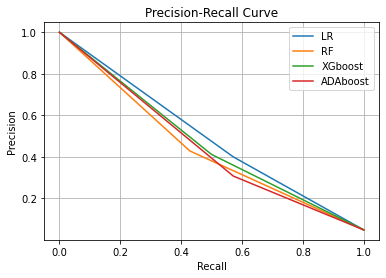

In [205]:
# precision and recall for each model
precision_model1, recall_model1, _ = precision_recall_curve(y_test, y_pred1)
precision_model2, recall_model2, _ = precision_recall_curve(y_test, y_pred2)
precision_model3, recall_model3, _ = precision_recall_curve(y_test, y_pred3)
precision_model4, recall_model4, _ = precision_recall_curve(y_test, y_pred4)

# Plot 
plt.plot(recall_model1, precision_model1, label='LR')
plt.plot(recall_model2, precision_model2, label='RF')
plt.plot(recall_model3, precision_model3, label='XGboost')
plt.plot(recall_model4, precision_model4, label='ADAboost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


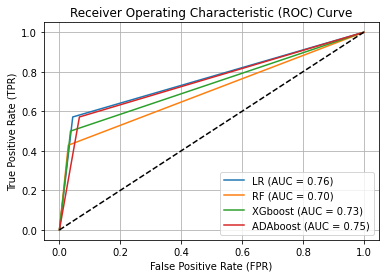

In [206]:
models_ypreds = [y_pred1, y_pred2, y_pred3, y_pred4]
model_names = ['LR', 'RF', 'XGboost', 'ADAboost']

# RUC-AUC plot
for i in range(len(models_ypreds)):
    fpr, tpr, _ = roc_curve(y_test, models_ypreds[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_names[i], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Appendix: Other feature sets

## 1 Adding 'Videogame genre' and 'Country'

### Data Processing

In [207]:
df2 = dfraw.dropna()
df2 = df.reset_index(drop=True) #reassigning the index values after cleaning missing values

#Preprocessing
df2 = df2.drop(df.loc[:, 'IA':], axis=1)


In [208]:
##Dropping outliers
df2 = df2.drop(df2[df2['SecondApp'] <= 0].index)
df2 = df2.drop(df2[df2['Education'] == 5].index)

print(df2['SecondApp'].value_counts())
df2['Education'].value_counts()


2    456
1    318
6    118
5     44
4     18
3      5
Name: SecondApp, dtype: int64


2    335
4    329
3    271
1     24
Name: Education, dtype: int64

In [209]:
df2.head()

,COUNTRY,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,InternetYears,OnlineHoursWeekday,PGameYears,PGameHours,Genre,SecondApp,IGDTotalScore
0,2,0,18.0,3,1,4,12.0,1,1,1,10.0,6.0,5.0,7.0,2,2,11.0
1,3,0,18.0,3,1,4,14.0,6,0,0,13.0,6.0,10.0,0.0,10,2,12.0
2,1,0,18.0,3,0,2,1.0,1,1,0,10.0,8.0,3.0,1.0,8,1,15.0
3,1,1,18.0,1,0,3,16.0,9,1,1,10.0,7.0,1.0,3.0,8,2,23.0
4,1,0,18.0,3,0,2,12.0,1,0,0,10.0,14.0,3.0,2.0,6,2,18.0


In [210]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=35) #**************

df2['IGD_presence'] = df2['IGDTotalScore'].apply(lambda x: binarizer.transform([[x]])[0][0])

df2.iloc[60:71,[16,-1]]


,IGDTotalScore,IGD_presence
60,14.0,0.0
61,28.0,0.0
62,26.0,0.0
63,24.0,0.0
64,21.0,0.0
65,29.0,0.0
66,28.0,0.0
67,36.0,1.0
68,27.0,0.0
69,37.0,1.0


In [211]:
# Extract X & y
X, y = df2.drop('IGD_presence', axis=1), df2[['IGD_presence']] 

Dropping the source of the dependant variable

In [212]:
print(y.head())
X = X.drop('IGDTotalScore',axis=1)
X.head()

   IGD_presence
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0


,COUNTRY,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,InternetYears,OnlineHoursWeekday,PGameYears,PGameHours,Genre,SecondApp
0,2,0,18.0,3,1,4,12.0,1,1,1,10.0,6.0,5.0,7.0,2,2
1,3,0,18.0,3,1,4,14.0,6,0,0,13.0,6.0,10.0,0.0,10,2
2,1,0,18.0,3,0,2,1.0,1,1,0,10.0,8.0,3.0,1.0,8,1
3,1,1,18.0,1,0,3,16.0,9,1,1,10.0,7.0,1.0,3.0,8,2
4,1,0,18.0,3,0,2,12.0,1,0,0,10.0,14.0,3.0,2.0,6,2


Identifying variable types

In [213]:
categorical_columns = ['COUNTRY', 'Gender', 'Occupation', 'Unemployed', 'LivingWith', 'RelationshipStat', 'PartnerParticipate', 'Genre'
                       , 'SecondApp']
numerical_columns = ['Age', 'SchoolYears', 'InternetYears', 'OnlineHoursWeekday', 'PGameYears', 'PGameHours']
ordinal_columns = ['Education'] #also for individual items


Data Splitting into test/training sample

In [214]:
y = df['IGD_presence'].values.ravel()

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y) # stratifying the y variable because of imbalance (MAYBE CHANGE IF IS LOWERING THE ACCURACY)

# Displaying the quantities
print('Observations on y_train:', Counter(y_train)) 
print('X_train shape:', X_train.shape)

print('\nObservations on y_test:', Counter(y_test))
print('X_test shape:', X_test.shape)

Observations on y_train: Counter({0.0: 639, 1.0: 32})
X_train shape: (671, 16)

Observations on y_test: Counter({0.0: 274, 1.0: 14})
X_test shape: (288, 16)


#### SMOTE

In [216]:
#Extracting Indexes of the categorical columns
categorical_position = [X_train.columns.get_loc(col) for col in categorical_columns]
ordinal_position = [X_train.columns.get_loc(colu) for colu in ordinal_columns]

allcat_position = categorical_position + ordinal_position

over = SMOTENC(categorical_features=allcat_position, random_state=23,sampling_strategy=0.2) #Articles suggest 10-40% of majority
under = RandomUnderSampler(sampling_strategy=0.4, random_state=25) #try with default options first, then play around, If cant solve it continue without smote

# transform the dataset
X_train_sm, y_train_sm = over.fit_resample(X_train, y_train) 
X_train_sm, y_train_sm = under.fit_resample(X_train_sm, y_train_sm) 

#checking dimension
print(Counter(y_train_sm))
X_train_sm.shape

Counter({0.0: 317, 1.0: 127})


(444, 16)

In [217]:
X_train_sm[numerical_columns] = X_train_sm[numerical_columns].round()

X_train_sm.tail()

,COUNTRY,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,InternetYears,OnlineHoursWeekday,PGameYears,PGameHours,Genre,SecondApp
439,1,0,23.0,3,1,2,9.0,1,1,0,11.0,13.0,4.0,10.0,7,1
440,1,1,19.0,3,1,2,3.0,1,0,0,7.0,12.0,0.0,2.0,7,2
441,1,0,25.0,2,0,3,2.0,1,1,0,14.0,11.0,7.0,11.0,11,1
442,1,1,22.0,3,0,3,13.0,9,0,0,14.0,3.0,13.0,2.0,11,1
443,1,0,20.0,3,0,4,13.0,2,1,0,10.0,16.0,6.0,8.0,7,1


#### Encoding variables

In [218]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ('ord', OrdinalEncoder(), ordinal_columns),
        ], remainder='passthrough')

# Fitting to the training data
preprocessor.fit(X_train_sm)

# Transform the training and testing data
X_train_enc = preprocessor.transform(X_train_sm)
X_test_enc = preprocessor.transform(X_test)

# Checking dimensions
print('X_train encoded:', X_train_enc.shape)
print('X_test encoded:', X_test_enc.shape)

X_train encoded: (444, 55)
X_test encoded: (288, 55)


### Models

1 Logistic Regression

In [219]:
from scipy.stats import uniform

logreg = LogisticRegression(solver='liblinear', random_state=23)

param_dist = {
    'C': [0.001, 0.01, 0.1, 0.5, 0.7, 0.15, 1, 10, 100, 1000], 
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga']
}

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'avg_precision': make_scorer(average_precision_score)
}

# Grid Search
model1_gs = GridSearchCV(logreg, param_grid=param_dist,  
    cv=5, scoring=scoring, refit='f1', n_jobs=-1
)

model1_gs.fit(X_train_enc, y_train_sm)

# Best hyperparameters
best_lr = model1_gs.best_estimator_
print('Best hyperparameters:',  model1_gs.best_params_)

y_pred1 = best_lr.predict(X_test_enc) #automatically use the best parameters

# Score on test
print(model1_gs.score(X_test_enc, y_test))

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

Best hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.18181818181818182

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       274
         1.0       0.13      0.29      0.18        14

    accuracy                           0.88       288
   macro avg       0.55      0.60      0.56       288
weighted avg       0.92      0.88      0.90       288


Confusion Matrix:
[[248  26]
 [ 10   4]]


c:\Users\erick\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


2 Random Forest

In [220]:
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ], remainder='passthrough')

# Fitting to the training data
preprocessor_rf.fit(X_train_sm)

# Transform the training and testing data
X_train_encrf = preprocessor_rf.transform(X_train_sm)
X_test_encrf = preprocessor_rf.transform(X_test)


# Checking dimensions
print(X_train_encrf.shape)
X_test_encrf.shape

(444, 55)


(288, 55)

Random search

In [221]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(1, 30),
    'criterion': ['gini', 'entropy'],
    'max_features': randint(1, 55)
}

# Random Forest
rf = RandomForestClassifier(random_state=23)

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'avg_precision': make_scorer(average_precision_score)
}

# Random Search CV
model2_rs = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=100, 
                                 cv=5, scoring=scoring, refit='f1', n_jobs=-1, random_state=23)


model2_rs.fit(X_train_encrf, y_train_sm)


# Best hyperparameters
best_rf = model2_rs.best_estimator_
print('Best hyperparameters:',  model2_rs.best_params_)

y_pred2 = best_rf.predict(X_test_encrf) #automatically use the best parameters

# Score on test
print(model2_rs.score(X_test_encrf, y_test))

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred2)) #row correspond to actual labels, columns to predicted labels. left-up=TN, FP/ FN, rightdown=TP

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 6, 'n_estimators': 186}
0.1

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       274
         1.0       0.17      0.07      0.10        14

    accuracy                           0.94       288
   macro avg       0.56      0.53      0.53       288
weighted avg       0.92      0.94      0.93       288


Confusion Matrix:
[[269   5]
 [ 13   1]]


3 XGboost

In [222]:
param_dist3 = {
    'n_estimators': randint(100, 300),  
    'learning_rate': uniform(0.01, 0.6),  
    'max_depth': randint(1, 15),  
    'min_child_weight': randint(1, 10),  
    'colsample_bytree': uniform(0.1, 0.9),  
    'gamma': uniform(0, 1), 
    'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
}



# Random Forest
xgboost = XGBClassifier(random_state=23)

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'average_precision': make_scorer(average_precision_score)
}

# Random Search CV
model3_rs = RandomizedSearchCV(xgboost, 
                                 param_distributions = param_dist3, 
                                 n_iter=200, 
                                 cv=5, scoring=scoring, refit='f1', n_jobs=-1, random_state=23)


model3_rs.fit(X_train_encrf, y_train_sm)


# Best hyperparameters
#best_4 = model3_rs.best_estimator_
print('Best hyperparameters:',  model3_rs.best_params_)

y_pred3 = model3_rs.predict(X_test_encrf) #automatically use the best parameters

print(model3_rs.score(X_test_encrf, y_test))

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

Best hyperparameters: {'colsample_bytree': 0.44853909324800745, 'gamma': 0.4890137374296799, 'learning_rate': 0.2565644302259099, 'max_depth': 12, 'min_child_weight': 2, 'n_estimators': 298, 'reg_alpha': 0.2}
0.14285714285714285

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       274
         1.0       0.14      0.14      0.14        14

    accuracy                           0.92       288
   macro avg       0.55      0.55      0.55       288
weighted avg       0.92      0.92      0.92       288


Confusion Matrix:
[[262  12]
 [ 12   2]]


Best estimators

In [223]:

temp_array = X_train_encrf.toarray()
X_train_encrfdf = pd.DataFrame(temp_array)


In [224]:
best_model3 = model3_rs.best_estimator_


importance3 = best_model3.feature_importances_

# Feature names
feature_names = X_train_encrfdf.columns.tolist()


feature_importance = list(zip(feature_names, importance3))


feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importance
for feature, importance_score in feature_importance:
    print(f"{feature}: {importance_score}")

9: 0.12573367357254028
10: 0.09849023073911667
43: 0.07271219044923782
29: 0.06549205631017685
28: 0.054520249366760254
8: 0.0514439195394516
54: 0.04103145748376846
13: 0.034112878143787384
7: 0.03289266303181648
35: 0.03010440245270729
50: 0.026814555749297142
49: 0.02544495090842247
48: 0.02526576817035675
53: 0.025037704035639763
12: 0.024348102509975433
14: 0.024135001003742218
27: 0.022666968405246735
51: 0.021468987688422203
6: 0.020027849823236465
36: 0.016763653606176376
2: 0.016034066677093506
52: 0.01452989224344492
24: 0.013212081976234913
21: 0.012908571399748325
16: 0.012869098223745823
15: 0.012858642265200615
0: 0.012602043338119984
1: 0.012281111441552639
40: 0.012216107919812202
26: 0.01068228017538786
44: 0.010161193087697029
31: 0.008429273962974548
37: 0.00826442614197731
23: 0.004444038029760122
3: 0.0
4: 0.0
5: 0.0
11: 0.0
17: 0.0
18: 0.0
19: 0.0
20: 0.0
22: 0.0
25: 0.0
30: 0.0
32: 0.0
33: 0.0
34: 0.0
38: 0.0
39: 0.0
41: 0.0
42: 0.0
45: 0.0
46: 0.0
47: 0.0


4 Adaboost

In [225]:
param_dist4 = {
    'n_estimators': randint(10, 400), 
    'learning_rate': uniform(0.01, 2), 
}

# Random Forest
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=23) 

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'avg_pre': make_scorer(average_precision_score)
}

# Random Search CV
model4_rs = RandomizedSearchCV(adaboost, 
                                 param_distributions = param_dist4, 
                                 n_iter=100, 
                                 cv=5, scoring=scoring, refit='f1', n_jobs=-1, random_state=23)


model4_rs.fit(X_train_encrf, y_train_sm)


# Best hyperparameters
best_4 = model4_rs.best_estimator_
print('Best hyperparameters:',  model4_rs.best_params_)

y_pred4 = best_4.predict(X_test_encrf) #automatically use the best parameters

# Score on test
print(model4_rs.score(X_test_encrf, y_test))

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred4))

Best hyperparameters: {'learning_rate': 0.15891840972900662, 'n_estimators': 201}
0.2222222222222222

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       274
         1.0       0.16      0.36      0.22        14

    accuracy                           0.88       288
   macro avg       0.56      0.63      0.58       288
weighted avg       0.93      0.88      0.90       288


Confusion Matrix:
[[248  26]
 [  9   5]]


In [226]:
models_ypreds = [y_pred1, y_pred2, y_pred3, y_pred4]
models_names = ['Logistic Regression', 'Random Forest', 'XGboost', 'Adaboost']

df_finalresult = pd.DataFrame(columns=['Model', 'TP', 'TN', 'FP', 'FN', 'Correct', 'Incorrect',
                                  'Accuracy', 'Precision', 'Recall', 'f1','avg_pre'])

for i in range(len(models_ypreds)):
    iypred = models_ypreds[i]
    model_name = models_names[i]

    tn, fp, fn, tp = confusion_matrix(y_test, iypred).ravel()
    accuracy = accuracy_score(y_test, iypred)
    precision = precision_score(y_test, iypred)
    recall = recall_score(y_test, iypred)
    f1 = f1_score(y_test, iypred)
    roc_auc = roc_auc_score(y_test, iypred)
    avg_precision = average_precision_score(y_test, iypred)

    row = {'Model': model_name,
            'TP': tp,
            'TN': tn,
            'FP': fp,
            'FN': fn,
            'Correct': tp+tn,
            'Incorrect': fp+fn,
            'Accuracy': round(accuracy,3),
            'Precision': round(precision,3),
            'Recall': round(recall,3),
            'f1': round(f1,3),
            'avg_pre': round(avg_precision,3),
        }

    df_finalresult = df_finalresult.append(row, ignore_index=True)
df_finalresult.head()

#Code based on Evaluation measures from https://practicaldatascience.co.uk/machine-learning/how-to-use-smote-for-imbalanced-classification

C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2800638011.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_finalresult = df_finalresult.append(row, ignore_index=True)
C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2800638011.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_finalresult = df_finalresult.append(row, ignore_index=True)
C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2800638011.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_finalresult = df_finalresult.append(row, ignore_index=True)
C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2800638011.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

,Model,TP,TN,FP,FN,Correct,Incorrect,Accuracy,Precision,Recall,f1,avg_pre
0,Logistic Regression,4,248,26,10,252,36,0.875,0.133,0.286,0.182,0.073
1,Random Forest,1,269,5,13,270,18,0.938,0.167,0.071,0.1,0.057
2,XGboost,2,262,12,12,264,24,0.917,0.143,0.143,0.143,0.062
3,Adaboost,5,248,26,9,253,35,0.878,0.161,0.357,0.222,0.089


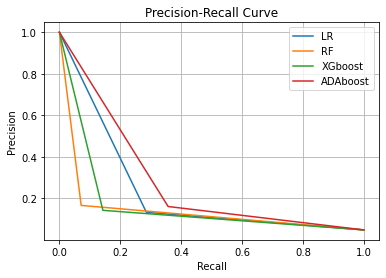

In [227]:
# precision and recall for each model
precision_model1, recall_model1, _ = precision_recall_curve(y_test, y_pred1)
precision_model2, recall_model2, _ = precision_recall_curve(y_test, y_pred2)
precision_model3, recall_model3, _ = precision_recall_curve(y_test, y_pred3)
precision_model4, recall_model4, _ = precision_recall_curve(y_test, y_pred4)

# Plot 
plt.plot(recall_model1, precision_model1, label='LR')
plt.plot(recall_model2, precision_model2, label='RF')
plt.plot(recall_model3, precision_model3, label='XGboost')
plt.plot(recall_model4, precision_model4, label='ADAboost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


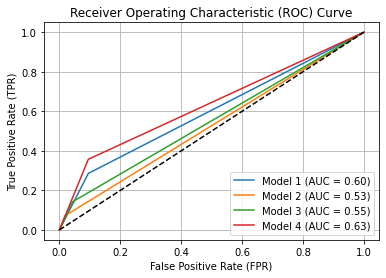

In [228]:
models_ypreds = [y_pred1, y_pred2, y_pred3, y_pred4]

# RUC-AUC plot
for i in range(len(models_ypreds)):
    fpr, tpr, _ = roc_curve(y_test, models_ypreds[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Model %d (AUC = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## 2 Baseline feature set without country nor genre

### Data Processing

In [229]:
df3 = dfraw.dropna()
df3 = df.reset_index(drop=True) #reassigning the index values after cleaning missing values

#Preprocessing
df3 = df3.drop(df.loc[:, 'IA':], axis=1)

df3 = df3.drop(['COUNTRY', 'Genre'], axis=1)

In [230]:
df3.columns

Index(['Gender', 'Age', 'Occupation', 'Unemployed', 'Education', 'SchoolYears',
       'LivingWith', 'RelationshipStat', 'PartnerParticipate', 'InternetYears',
       'OnlineHoursWeekday', 'PGameYears', 'PGameHours', 'SecondApp',
       'IGDTotalScore'],
      dtype='object')

In [231]:
##Dropping outliers
df3 = df3.drop(df3[df3['SecondApp'] <= 0].index)
df3 = df3.drop(df3[df3['Education'] == 5].index)

In [232]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=35) #**************

df3['IGD_presence'] = df3['IGDTotalScore'].apply(lambda x: binarizer.transform([[x]])[0][0])

df3.iloc[60:71]


,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,InternetYears,OnlineHoursWeekday,PGameYears,PGameHours,SecondApp,IGDTotalScore,IGD_presence
60,1,18.0,3,1,2,12.0,5,1,1,8.0,18.0,2.0,6.0,2,14.0,0.0
61,0,18.0,3,0,4,16.0,1,1,1,10.0,5.0,2.0,5.0,5,28.0,0.0
62,0,18.0,3,1,2,11.0,11,0,0,14.0,14.0,8.0,4.0,1,26.0,0.0
63,0,18.0,1,0,2,12.0,5,0,0,12.0,16.0,1.0,14.0,1,24.0,0.0
64,1,18.0,3,0,3,13.0,3,1,1,15.0,10.0,2.0,2.0,1,21.0,0.0
65,1,18.0,3,1,2,13.0,1,1,1,12.0,6.0,2.0,2.0,1,29.0,0.0
66,1,18.0,3,1,2,13.0,1,0,0,13.0,10.0,1.0,2.0,2,28.0,0.0
67,0,18.0,3,1,2,13.0,1,1,0,10.0,15.0,6.0,6.0,1,36.0,1.0
68,0,18.0,3,1,2,12.0,11,0,1,8.0,12.0,3.0,4.0,2,27.0,0.0
69,0,18.0,3,1,1,13.0,1,0,0,5.0,15.0,0.0,0.0,1,37.0,1.0


In [233]:
# Extract X & y
X, y = df3.drop('IGD_presence', axis=1), df3[['IGD_presence']] 

Dropping the source of the dependant variable

In [234]:
print(y.head())
X = X.drop('IGDTotalScore',axis=1)
X.head()

   IGD_presence
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0


,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,InternetYears,OnlineHoursWeekday,PGameYears,PGameHours,SecondApp
0,0,18.0,3,1,4,12.0,1,1,1,10.0,6.0,5.0,7.0,2
1,0,18.0,3,1,4,14.0,6,0,0,13.0,6.0,10.0,0.0,2
2,0,18.0,3,0,2,1.0,1,1,0,10.0,8.0,3.0,1.0,1
3,1,18.0,1,0,3,16.0,9,1,1,10.0,7.0,1.0,3.0,2
4,0,18.0,3,0,2,12.0,1,0,0,10.0,14.0,3.0,2.0,2


Identifying variable types

In [235]:
categorical_columns = ['Gender', 'Occupation', 'Unemployed', 'LivingWith', 'RelationshipStat', 'PartnerParticipate', 'SecondApp']
numerical_columns = ['Age', 'SchoolYears', 'InternetYears', 'OnlineHoursWeekday', 'PGameYears', 'PGameHours']
ordinal_columns = ['Education'] #also for individual items


Data Splitting into test/training sample

In [236]:
y = df3['IGD_presence'].values.ravel()

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y) # stratifying the y variable because of imbalance (MAYBE CHANGE IF IS LOWERING THE ACCURACY)

# Displaying the quantities
print('Observations on y_train:', Counter(y_train)) 
print('X_train shape:', X_train.shape)

print('\nObservations on y_test:', Counter(y_test))
print('X_test shape:', X_test.shape)

Observations on y_train: Counter({0.0: 639, 1.0: 32})
X_train shape: (671, 14)

Observations on y_test: Counter({0.0: 274, 1.0: 14})
X_test shape: (288, 14)


#### SMOTE

In [238]:
#Extracting Indexes of the categorical columns
categorical_position = [X_train.columns.get_loc(col) for col in categorical_columns]
ordinal_position = [X_train.columns.get_loc(colu) for colu in ordinal_columns]

allcat_position = categorical_position + ordinal_position

over = SMOTENC(categorical_features=allcat_position, random_state=23,sampling_strategy=0.2) #?????????????????until what percentage is good to oversample using SMOTE? websites suggest 10-40% of majority
under = RandomUnderSampler(sampling_strategy=0.4, random_state=25) #try with default options first, then play around, If cant solve it continue without smote

# transform the dataset
X_train_sm, y_train_sm = over.fit_resample(X_train, y_train) 
X_train_sm, y_train_sm = under.fit_resample(X_train_sm, y_train_sm) 

#checking dimension
print(Counter(y_train_sm))
X_train_sm.shape

Counter({0.0: 317, 1.0: 127})


(444, 14)

In [239]:
X_train_sm[numerical_columns] = X_train_sm[numerical_columns].round()

X_train_sm.tail()

,Gender,Age,Occupation,Unemployed,Education,SchoolYears,LivingWith,RelationshipStat,PartnerParticipate,InternetYears,OnlineHoursWeekday,PGameYears,PGameHours,SecondApp
439,0,25.0,3,0,2,7.0,10,1,0,12.0,11.0,3.0,9.0,1
440,1,19.0,2,1,2,3.0,10,0,0,7.0,12.0,0.0,2.0,2
441,0,25.0,2,0,4,2.0,1,1,0,14.0,11.0,7.0,11.0,1
442,1,21.0,3,0,3,12.0,9,0,0,14.0,3.0,13.0,2.0,1
443,0,20.0,3,0,4,13.0,2,1,0,10.0,16.0,6.0,8.0,1


#### Encoding variables

In [240]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ('ord', OrdinalEncoder(), ordinal_columns),
        ], remainder='passthrough')

# Fitting to the training data
preprocessor.fit(X_train_sm)

# Transform the training and testing data
X_train_enc = preprocessor.transform(X_train_sm)
X_test_enc = preprocessor.transform(X_test)

# Checking dimensions
print('X_train encoded:', X_train_enc.shape)
print('X_test encoded:', X_test_enc.shape)

X_train encoded: (444, 37)
X_test encoded: (288, 37)


### Models

1 Logistic Regression

In [241]:
logreg = LogisticRegression(solver='liblinear', random_state=23)

param_dist = {
    'C': [0.001, 0.01, 0.1, 0.5, 0.7, 0.15, 1, 10, 100, 1000], 
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga']
}

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'avg_precision': make_scorer(average_precision_score)
}

model1_gs = GridSearchCV(logreg, param_grid=param_dist,  
    cv=5, scoring=scoring, refit='f1', n_jobs=-1
)

model1_gs.fit(X_train_enc, y_train_sm)

# Best hyperparameters
best_lr = model1_gs.best_estimator_
print('Best hyperparameters:',  model1_gs.best_params_)

y_pred1 = best_lr.predict(X_test_enc) #automatically use the best parameters

# Score on test
print(model1_gs.score(X_test_enc, y_test))

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

Best hyperparameters: {'C': 0.7, 'penalty': 'l1', 'solver': 'liblinear'}
0.18604651162790697

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       274
         1.0       0.14      0.29      0.19        14

    accuracy                           0.88       288
   macro avg       0.55      0.60      0.56       288
weighted avg       0.92      0.88      0.90       288


Confusion Matrix:
[[249  25]
 [ 10   4]]


2 Random Forest

In [242]:

preprocessor_rf = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ], remainder='passthrough')

# Fitting to the training data
preprocessor_rf.fit(X_train_sm)

# Transform the training and testing data
X_train_encrf = preprocessor_rf.transform(X_train_sm)
X_test_encrf = preprocessor_rf.transform(X_test)


# Checking dimensions
print(X_train_encrf.shape)
X_test_encrf.shape

(444, 37)


(288, 37)

In [243]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(1, 30),
    'criterion': ['gini', 'entropy'],
    'max_features': randint(1, 20)
}
# Random Forest
rf = RandomForestClassifier(random_state=23)

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'avg_precision': make_scorer(average_precision_score)
}

# Random Search CV
model2_rs = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=100, 
                                 cv=5, scoring=scoring, refit='f1', n_jobs=-1, random_state=23)


model2_rs.fit(X_train_encrf, y_train_sm)


# Best hyperparameters
best_rf = model2_rs.best_estimator_
print('Best hyperparameters:',  model2_rs.best_params_)

y_pred2 = best_rf.predict(X_test_encrf) #automatically use the best parameters

# Score on test
print(model2_rs.score(X_test_encrf, y_test))

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 17, 'max_features': 4, 'n_estimators': 149}
0.1

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       274
         1.0       0.17      0.07      0.10        14

    accuracy                           0.94       288
   macro avg       0.56      0.53      0.53       288
weighted avg       0.92      0.94      0.93       288


Confusion Matrix:
[[269   5]
 [ 13   1]]


3 XGboost

In [244]:
param_dist3 = {
    'n_estimators': randint(100, 300),  
    'learning_rate': uniform(0.01, 0.6),  
    'max_depth': randint(1, 15),  
    'min_child_weight': randint(1, 10),  
    'colsample_bytree': uniform(0.1, 0.9),  
    'gamma': uniform(0, 1), 
    'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
}



# Classifier
xgboost = XGBClassifier(random_state=23)

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'avg_precision': make_scorer(average_precision_score)
}

# Random Search CV
model3_rs = RandomizedSearchCV(xgboost, 
                                 param_distributions = param_dist3, 
                                 n_iter=200, 
                                 cv=5, scoring=scoring, refit='f1', n_jobs=-1, random_state=23)

# Fitting the model
model3_rs.fit(X_train_encrf, y_train_sm)


# Best hyperparameters
print('Best hyperparameters:',  model3_rs.best_params_)

y_pred3 = model3_rs.predict(X_test_encrf) #automatically use the best parameters

# Score on test
print(model3_rs.score(X_test_encrf, y_test))

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

Best hyperparameters: {'colsample_bytree': 0.710311614837572, 'gamma': 0.4776394293348514, 'learning_rate': 0.04661888957359067, 'max_depth': 12, 'min_child_weight': 3, 'n_estimators': 218, 'reg_alpha': 0}
0.20689655172413796

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       274
         1.0       0.20      0.21      0.21        14

    accuracy                           0.92       288
   macro avg       0.58      0.59      0.58       288
weighted avg       0.92      0.92      0.92       288


Confusion Matrix:
[[262  12]
 [ 11   3]]


Best estimators

In [245]:
X_train_encrfdf = pd.DataFrame(X_train_encrf)

best_model3 = model3_rs.best_estimator_


importance3 = best_model3.feature_importances_

# Feature names
feature_names = X_train_encrfdf.columns.tolist()

feature_importance = list(zip(feature_names, importance3))


feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importance
for feature, importance_score in feature_importance:
    print(f"{feature}: {importance_score}")

5: 0.09734775871038437
25: 0.08766128867864609
7: 0.06272947043180466
36: 0.06037100404500961
24: 0.05301717296242714
2: 0.04628169164061546
23: 0.04359157383441925
8: 0.03995942696928978
32: 0.03911479935050011
21: 0.038593292236328125
0: 0.03745840862393379
18: 0.03545449301600456
1: 0.035052888095378876
22: 0.03471728414297104
30: 0.029189540073275566
19: 0.02829204685986042
31: 0.027839286252856255
9: 0.027618788182735443
33: 0.02661803737282753
34: 0.02659599483013153
35: 0.024408817291259766
26: 0.021972762420773506
3: 0.02018020488321781
10: 0.017029715701937675
16: 0.01508562546223402
11: 0.013744210824370384
4: 0.010074443183839321
6: 0.0
12: 0.0
13: 0.0
14: 0.0
15: 0.0
17: 0.0
20: 0.0
27: 0.0
28: 0.0
29: 0.0


4 Adaboost

In [246]:
param_dist4 = {
    'n_estimators': randint(10, 400), 
    'learning_rate': uniform(0.01, 2), 
}

# Classifier
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=23) 

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'avg_precision': make_scorer(average_precision_score)
}

# Random Search CV
model4_rs = RandomizedSearchCV(adaboost, 
                                 param_distributions = param_dist4, 
                                 n_iter=100, 
                                 cv=5, scoring=scoring, refit='f1', n_jobs=-1, random_state=23)


model4_rs.fit(X_train_encrf, y_train_sm)


# Best hyperparameters
best_4 = model4_rs.best_estimator_
print('Best hyperparameters:',  model4_rs.best_params_)

y_pred4 = best_4.predict(X_test_encrf) #automatically use the best parameters

# Score on test
print(model4_rs.score(X_test_encrf, y_test))

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred4))

Best hyperparameters: {'learning_rate': 0.9387712295604049, 'n_estimators': 80}
0.2978723404255319

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       274
         1.0       0.21      0.50      0.30        14

    accuracy                           0.89       288
   macro avg       0.59      0.70      0.62       288
weighted avg       0.94      0.89      0.91       288


Confusion Matrix:
[[248  26]
 [  7   7]]


In [247]:
models_ypreds = [y_pred1, y_pred2, y_pred3, y_pred4]
models_names = ['Logistic Regression', 'Random Forest', 'XGboost', 'Adaboost']

df_finalresult = pd.DataFrame(columns=['Model', 'TP', 'TN', 'FP', 'FN', 'Correct', 'Incorrect',
                                  'Accuracy', 'Precision', 'Recall', 'f1', 'avg_pre'])

for i in range(len(models_ypreds)):
    iypred = models_ypreds[i]
    model_name = models_names[i]

    tn, fp, fn, tp = confusion_matrix(y_test, iypred).ravel()
    accuracy = accuracy_score(y_test, iypred)
    precision = precision_score(y_test, iypred)
    recall = recall_score(y_test, iypred)
    f1 = f1_score(y_test, iypred)
    roc_auc = roc_auc_score(y_test, iypred)
    avg_precision = average_precision_score(y_test, iypred)

    row = {'Model': model_name,
            'TP': tp,
            'TN': tn,
            'FP': fp,
            'FN': fn,
            'Correct': tp+tn,
            'Incorrect': fp+fn,
            'Accuracy': round(accuracy,3),
            'Precision': round(precision,3),
            'Recall': round(recall,3),
            'f1': round(f1,3),
            'avg_pre': round(avg_precision,3),
        }

    df_finalresult = df_finalresult.append(row, ignore_index=True)
df_finalresult.head()

#Code based on Evaluation measures from https://practicaldatascience.co.uk/machine-learning/how-to-use-smote-for-imbalanced-classification

C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2264479296.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_finalresult = df_finalresult.append(row, ignore_index=True)
C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2264479296.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_finalresult = df_finalresult.append(row, ignore_index=True)
C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2264479296.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_finalresult = df_finalresult.append(row, ignore_index=True)
C:\Users\erick\AppData\Local\Temp\ipykernel_30440\2264479296.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

,Model,TP,TN,FP,FN,Correct,Incorrect,Accuracy,Precision,Recall,f1,avg_pre
0,Logistic Regression,4,249,25,10,253,35,0.878,0.138,0.286,0.186,0.074
1,Random Forest,1,269,5,13,270,18,0.938,0.167,0.071,0.1,0.057
2,XGboost,3,262,12,11,265,23,0.92,0.2,0.214,0.207,0.081
3,Adaboost,7,248,26,7,255,33,0.885,0.212,0.5,0.298,0.13


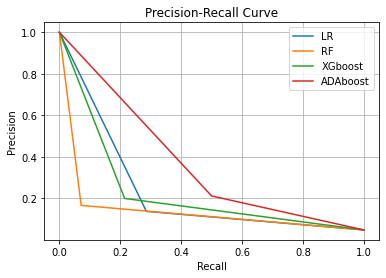

In [248]:
# precision and recall for each model
precision_model1, recall_model1, _ = precision_recall_curve(y_test, y_pred1)
precision_model2, recall_model2, _ = precision_recall_curve(y_test, y_pred2)
precision_model3, recall_model3, _ = precision_recall_curve(y_test, y_pred3)
precision_model4, recall_model4, _ = precision_recall_curve(y_test, y_pred4)

# Plot 
plt.plot(recall_model1, precision_model1, label='LR')
plt.plot(recall_model2, precision_model2, label='RF')
plt.plot(recall_model3, precision_model3, label='XGboost')
plt.plot(recall_model4, precision_model4, label='ADAboost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


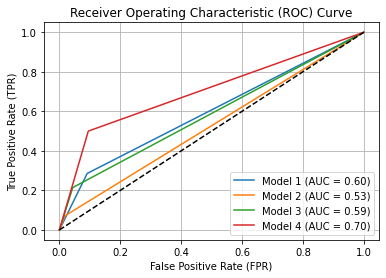

In [249]:
models_ypreds = [y_pred1, y_pred2, y_pred3, y_pred4]

# RUC-AUC plot
for i in range(len(models_ypreds)):
    fpr, tpr, _ = roc_curve(y_test, models_ypreds[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Model %d (AUC = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
